In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
def read_video(path):
    capture = cv2.VideoCapture(path)
    if capture.isOpened():
        print('open success')
        result = []
        open, frame = capture.read()
        H, W = frame.shape[:-1]
        for i in range(3):
            M = frame[:,:,i].flatten('F')
            result.append(M.reshape(-1, 1, order='F'))
    else:
        print('open fail')
        open = False

    while open:
        ret, frame = capture.read()
        if frame is None:
            for i in range(3):
                result[i] = result[i].astype(float)
            return result, H, W
        for i in range(3):
            M = frame[:,:,i].flatten('F')
            m = M.reshape(-1, 1, order='F')
            result[i] = np.concatenate((result[i], m), axis=1)

In [2]:
from scipy.sparse.linalg import svds

def extract_scipy(A):
    u, s, v = svds(A, k=1)
    u1 = u[:,-1]
    s1 = s[-1]
    v1 = v[-1]
    B = s1 * v1[0] * u1
    return B

def extract_PI(A, threshold = 10**(-4)):
    M = A.T @ A
    w =  M.shape[1]
    x = np.full((w, 1), (1/w)**0.5)
    sigma = x.T @ M @ x
    i = 0
    while (np.linalg.norm((M@x - sigma*x)/w)) > threshold:
        i += 1
        x_ = M @ x
        x = x_ / np.linalg.norm(x_)
        sigma = x.T @ x_
    v = x
    B = v[0] * (A @ v)
    return B

In [3]:
def run(A, H, W, method):
    result = np.zeros((H,W,3))
    for i in range(3):
        ATA = A[i]
        if method == "scipy":
            print('---extracting layer{:d} by scipy---'.format(i+1))
            B = extract_scipy(ATA)
        elif method == "Normalized Power Iteration":
            print('---extracting layer{:d} with Normalized Power Iteration---'.format(i+1))
            B = extract_PI(ATA)
        img = B.reshape(H, W, order='F')
        img[img>255] = 255
        img[img<0] = 0
        result[:,:,2-i] = img
    return np.uint8(result)

In [4]:
time_list = [[],[]]

start running test_videos\640_360\walking.mp4
---creating matrix A---
open success
---extracting layer1 by scipy---
---extracting layer2 by scipy---
---extracting layer3 by scipy---
run test_videos\640_360\walking.mp4 with scipy in 18.7012s
---extracting layer1 with Normalized Power Iteration---


C:\Users\Charon\AppData\Local\Temp\ipykernel_26820\3265707224.py:12: RuntimeWarning: invalid value encountered in matmul
  M = A.T @ A


---extracting layer2 with Normalized Power Iteration---
---extracting layer3 with Normalized Power Iteration---
run test_videos\640_360\walking.mp4 with PI in 26.1689s


Text(0.5, 1.0, 'produced by Power Iteration')

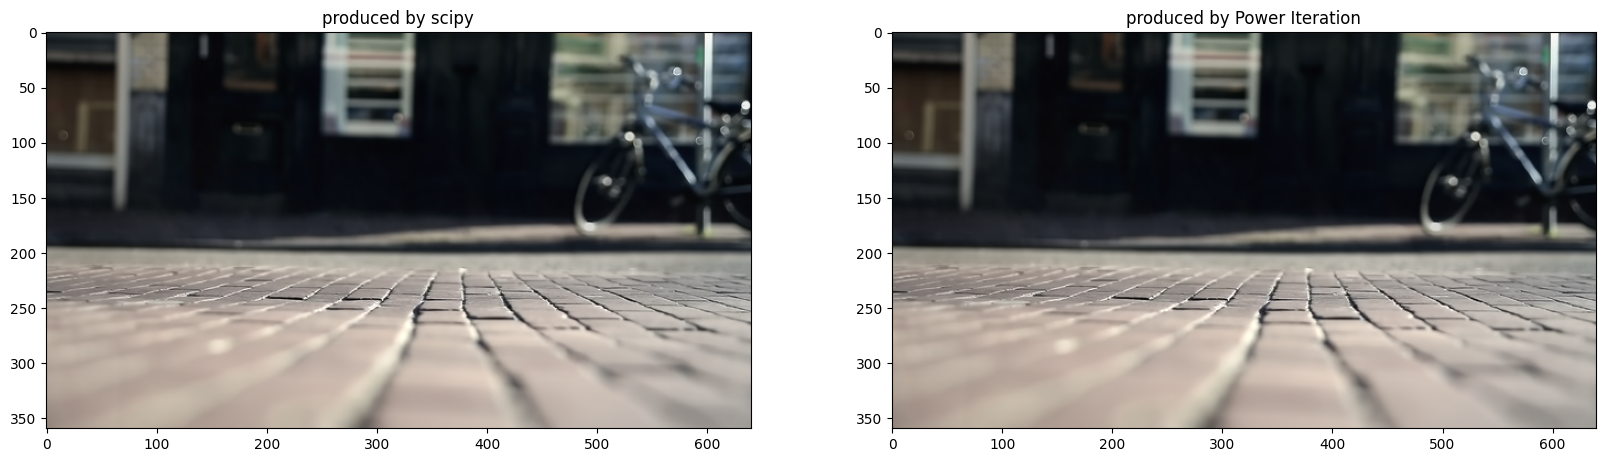

In [6]:
video_name = "test_videos\\640_360\\walking.mp4"
print("start running " + video_name)
print('---creating matrix A---')
A, H, W = read_video(video_name)

start_time = time.time()
result_scipy = run(A, H, W, "scipy")
end_time = time.time()
used_time_scipy = end_time - start_time
print('run ' + video_name + ' with scipy in ' + '{:.4f}'.format(used_time_scipy) + 's')

start_time = time.time()
result_PI = run(A, H, W, "Normalized Power Iteration")
end_time = time.time()
used_time_PI = end_time - start_time
print('run ' + video_name + ' with PI in ' + '{:.4f}'.format(used_time_PI) + 's')

time_list[0].append(used_time_scipy)
time_list[1].append(used_time_PI)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,16))
ax1.imshow(result_scipy)
ax1.set_title("produced by scipy")
ax2.imshow(result_scipy)
ax2.set_title('produced by Power Iteration')

start running test_videos\1280_720\road.mp4
---creating matrix A---
open success
---extracting layer1 by scipy---
---extracting layer2 by scipy---
---extracting layer3 by scipy---
run test_videos\1280_720\road.mp4 with scipy in 25.1982s
---extracting layer1 with Normalized Power Iteration---


C:\Users\Charon\AppData\Local\Temp\ipykernel_15640\3265707224.py:12: RuntimeWarning: invalid value encountered in matmul
  M = A.T @ A


---extracting layer2 with Normalized Power Iteration---
---extracting layer3 with Normalized Power Iteration---
run test_videos\1280_720\road.mp4 with PI in 10.1127s


Text(0.5, 1.0, 'produced by Power Iteration')

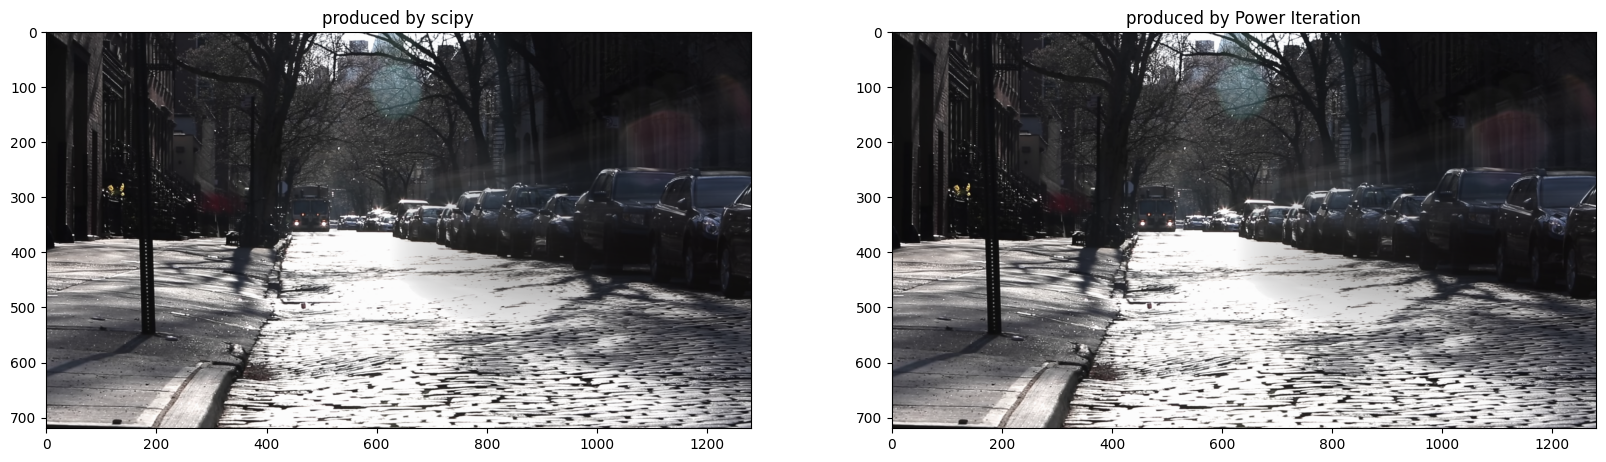

<Figure size 800x600 with 0 Axes>

In [5]:
video_name = "test_videos\\1280_720\\road.mp4"
print("start running " + video_name)
print('---creating matrix A---')
A, H, W = read_video(video_name)

start_time = time.time()
result_scipy = run(A, H, W, "scipy")
end_time = time.time()
used_time_scipy = end_time - start_time
print('run ' + video_name + ' with scipy in ' + '{:.4f}'.format(used_time_scipy) + 's')

start_time = time.time()
result_PI = run(A, H, W, "Normalized Power Iteration")
end_time = time.time()
used_time_PI = end_time - start_time
print('run ' + video_name + ' with PI in ' + '{:.4f}'.format(used_time_PI) + 's')

time_list[0].append(used_time_scipy)
time_list[1].append(used_time_PI)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,16))
plt.figure(figsize=(8,6))
ax1.imshow(result_scipy)
ax1.set_title("produced by scipy")
ax2.imshow(result_scipy)
ax2.set_title('produced by Power Iteration')

start running test_videos\1920_1080\sanfrancisco_02.mp4
---creating matrix A---
open success
---extracting layer1 by scipy---
---extracting layer2 by scipy---
---extracting layer3 by scipy---
run test_videos\1920_1080\sanfrancisco_02.mp4 with scipy in 125.9285s
---extracting layer1 with Normalized Power Iteration---


C:\Users\Charon\AppData\Local\Temp\ipykernel_27328\3265707224.py:12: RuntimeWarning: invalid value encountered in matmul
  M = A.T @ A


---extracting layer2 with Normalized Power Iteration---
---extracting layer3 with Normalized Power Iteration---
run test_videos\1920_1080\sanfrancisco_02.mp4 with PI in 93.2561s


Text(0.5, 1.0, 'produced by Power Iteration')

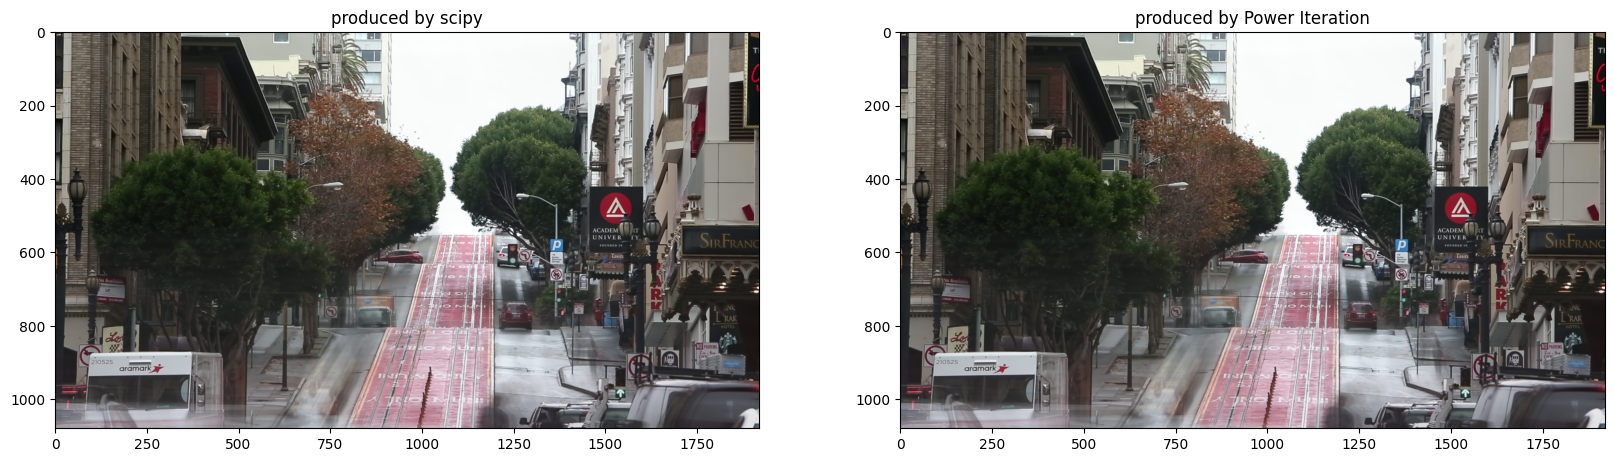

<Figure size 800x600 with 0 Axes>

In [6]:
video_name = "test_videos\\1920_1080\\sanfrancisco_02.mp4"
print("start running " + video_name)
print('---creating matrix A---')
A, H, W = read_video(video_name)

start_time = time.time()
result_scipy = run(A, H, W, "scipy")
end_time = time.time()
used_time_scipy = end_time - start_time
print('run ' + video_name + ' with scipy in ' + '{:.4f}'.format(used_time_scipy) + 's')

start_time = time.time()
result_PI = run(A, H, W, "Normalized Power Iteration")
end_time = time.time()
used_time_PI = end_time - start_time
print('run ' + video_name + ' with PI in ' + '{:.4f}'.format(used_time_PI) + 's')

time_list[0].append(used_time_scipy)
time_list[1].append(used_time_PI)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,16))
plt.figure(figsize=(8,6))
ax1.imshow(result_scipy)
ax1.set_title("produced by scipy")
ax2.imshow(result_scipy)
ax2.set_title('produced by Power Iteration')

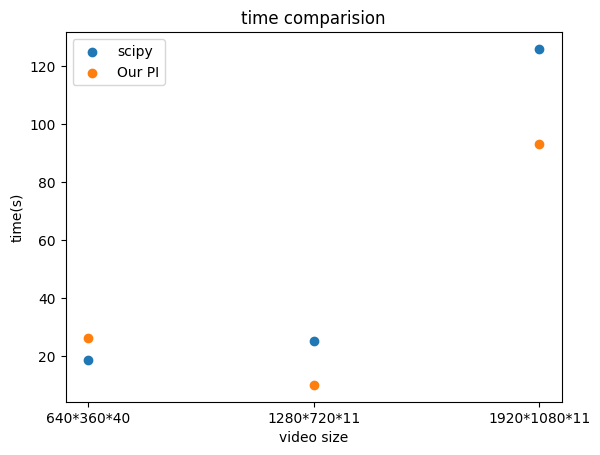

In [6]:
x = ['640*360*40','1280*720*11','1920*1080*11']
plt.scatter(x, [time_list[0]], label = 'scipy')
plt.scatter(x, time_list[1], label = 'Our PI')
plt.title('time comparision')
plt.xlabel('video size')
plt.ylabel('time(s)')
plt.legend()